### Pandas 사용

In [139]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import platform

# DF객체 생성하기
subwayDF = pd.read_csv('subwaytime.csv', header=[0,1])
subwayDF

# 사용할 데이터 전처리 과정
subway_nameDF=subwayDF.iloc[:, [1,3]]
subway_peopleDF=subwayDF.iloc[:, [11,13]]
subway_people_sumDF=subway_peopleDF.sum(axis=1)
subway_dataDF = pd.concat([subway_nameDF,subway_people_sumDF],axis=1)
subway_dataDF.columns = ['호선명','지하철역','출근시간 하차인원']
subway_dataDF

# 한글폰트 깨짐 해결
if platform.system() == 'Windows':    # 윈도우
        font_name = fm.FontProperties(fname='c:\Windows\Fonts\malgun.ttf').get_name()
        plt.rc('font', family=font_name)
else:    # 그 외
    plt.rc('font', family='AppleGothic', size=8)

출근 시간대 1호선 최대 하차역은 종각역이고 하차인원은 330,536명 입니다.
출근 시간대 2호선 최대 하차역은 역삼역이고 하차인원은 479,969명 입니다.
출근 시간대 3호선 최대 하차역은 양재(서초구청)역이고 하차인원은 331,279명 입니다.
출근 시간대 4호선 최대 하차역은 충무로역이고 하차인원은 208,776명 입니다.
출근 시간대 5호선 최대 하차역은 여의도역이고 하차인원은 352,602명 입니다.
출근 시간대 6호선 최대 하차역은 공덕역이고 하차인원은 134,342명 입니다.
출근 시간대 7호선 최대 하차역은 가산디지털단지역이고 하차인원은 486,420명 입니다.


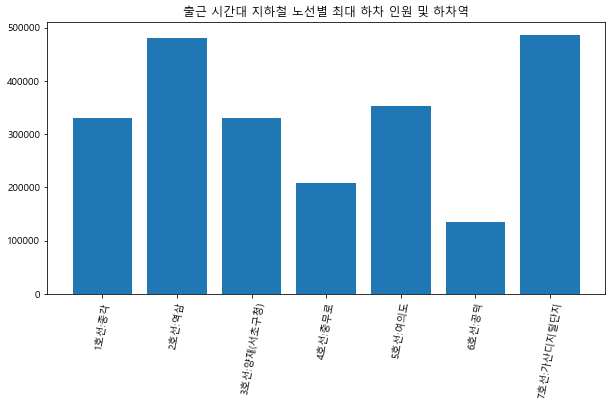

In [157]:
# 데이터 계산
station_name_list = []
data_list = []

for i in range(1,8):
    line = str(i) + '호선'
    filter = (subway_dataDF['호선명']==line)
    value = subway_dataDF[filter]['출근시간 하차인원'].max()
    idx = subway_dataDF[filter]['출근시간 하차인원'].idxmax()
    station = subway_dataDF.iloc[idx]
    station_name = station[0] + ':' + station[1]
    station_name_list.append(station_name)
    data_list.append(station[2])
    print(f'출근 시간대 {station[0]} 최대 하차역은 {station[1]}역이고 하차인원은 {station[2]:,}명 입니다.')

# 그래프 시각화
plt.figure(figsize=(10,5))
plt.bar(station_name_list,data_list)
plt.title('출근 시간대 지하철 노선별 최대 하차 인원 및 하차역')
plt.xticks(rotation=80)
plt.show()

### Pandas 미사용

In [197]:
# 모듈 로딩
import csv

# 호선 리스트 생성
line_list = []
for i in range(1,8):
    line_list.append(str(i)+'호선')
    
station_name_list = []
peolple_data_list = []
# 파일 불러오기
with open('subwaytime.csv', encoding = 'utf-8-sig') as f:
    data = csv.reader(f)
    # 헤더 2개 날리기
    next(data)
    next(data)
    for row in f:
        row_data = row.split(',')
        row_data[1]    # 호선 데이터
        row_data[3]    # 역 데이터

        